<a href="https://colab.research.google.com/github/toaomalkster/conscious-calculator-notebooks/blob/feature%2F20201025-load-existing-notebooks/ConscConcluderV2_0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conscious Concluder _(Theory V2)_
0.2:
* Running training loop explicitly.

**App Boilerplate**

In [ ]:

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import time

print(tf.__version__)


2.3.0


# Setup Training Data

In [ ]:
data = np.random.randint(100, size=(1000, 2)).astype('float32')
data[0:10,:]

array([[47., 86.],
       [50., 35.],
       [ 2., 58.],
       [61., 12.],
       [71., 10.],
       [94., 18.],
       [67., 74.],
       [ 6., 96.],
       [61., 53.],
       [ 2., 15.]], dtype=float32)

In [ ]:
data_labels = (data[:,0] + data[:,1])[:,np.newaxis]
data_labels[0:10,:]

array([[133.],
       [ 85.],
       [ 60.],
       [ 73.],
       [ 81.],
       [112.],
       [141.],
       [102.],
       [114.],
       [ 17.]], dtype=float32)

# Setup Model

In [ ]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(2,)),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1)
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1000)              3000      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 1001      
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________


# Setup Training
Running equivalent of:
```
# fitres = model.fit(data, data_labels, validation_split=0.2, shuffle=True, epochs=150)
```

In [ ]:
optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
loss = tf.keras.losses.MeanSquaredError()

@tf.function
def train_step(step_train_data, step_train_labels):
  with tf.GradientTape() as tape:
    output = model(step_train_data, training=True)
    step_loss = loss(output, step_train_labels)
    gradients = tape.gradient(step_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return step_loss

In [ ]:
def fit(train_data, train_labels, epochs, batch_size):
  res = {}
  res['loss'] = []

  for epoch in range(epochs):
    print ('Epoch: {}/{}'.format(epoch+1, epochs))
    start = time.time()
    sum_loss = 0

    # Train in batches
    mx = (int(len(train_data)/batch_size))*batch_size
    n  = mx/batch_size
    print ('[', end='')
    for i in range(0, mx, batch_size):
      batch_data   = train_data[i:i+batch_size]
      batch_labels = train_labels[i:i+batch_size]
      sum_loss += train_step(batch_data, batch_labels)
      print ('=', end='')
    print('] - {} sec - loss: {}'.format(time.time()-start, sum_loss/n))

    # Record history
    res['loss'].append(sum_loss/n)

  return res

# Run Training

In [ ]:
fitres = fit(data, data_labels, 150, 32)

Epoch: 0/150
[===============================] - 0.24302434921264648 sec - loss: 9014.7822265625
Epoch: 1/150
[===============================] - 0.044889211654663086 sec - loss: 5436.7548828125
Epoch: 2/150
[===============================] - 0.04115724563598633 sec - loss: 2716.255859375
Epoch: 3/150
[===============================] - 0.0393671989440918 sec - loss: 964.7929077148438
Epoch: 4/150
[===============================] - 0.04295229911804199 sec - loss: 208.25111389160156
Epoch: 5/150
[===============================] - 0.04304361343383789 sec - loss: 26.20703125
Epoch: 6/150
[===============================] - 0.03857612609863281 sec - loss: 2.6785733699798584
Epoch: 7/150
[===============================] - 0.038747310638427734 sec - loss: 0.8845231533050537
Epoch: 8/150
[===============================] - 0.03751635551452637 sec - loss: 0.7738689184188843
Epoch: 9/150
[===============================] - 0.03929924964904785 sec - loss: 0.751897931098938
Epoch: 10/150
[===

# Results

In [ ]:
print(['x', 'y', 'expected', 'actual'])
print(np.concatenate((data[800:810], data_labels[800:810], model.predict(data[800:810])), axis=1))

['x', 'y', 'expected', 'actual']
[[ 20.        17.        37.        37.26221 ]
 [ 58.        51.       109.       109.09388 ]
 [ 98.        97.       195.       194.89513 ]
 [ 80.        49.       129.       128.94    ]
 [ 18.        29.        47.        47.201694]
 [ 83.        66.       149.       148.99342 ]
 [ 55.        38.        93.        93.08873 ]
 [ 63.        88.       151.       150.92436 ]
 [ 72.         9.        81.        80.96572 ]
 [ 81.        32.       113.       112.95674 ]]


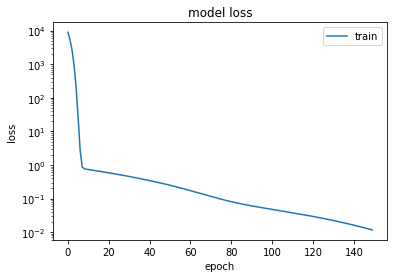

In [ ]:
plt.semilogy(fitres['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()